# Priority Queue

### Python Libaries

In [44]:
# Import Python standard library and IPython packages we need.
import os
import subprocess
import sys
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
from collections import defaultdict

# Ask GRASS GIS where its Python packages are.
gisbase = subprocess.check_output(["grass", "--config", "path"], text=True).strip()
os.environ["GISBASE"] = gisbase
sys.path.append(os.path.join(gisbase, "etc", "python"))

# Import the GRASS GIS packages we need.
import grass.script as gs
import grass.jupyter as gj

# Helper function saved in rapid_dem.py
import rapid_dem as rd

# Start GRASS Session
## Set your grass data location
gj.init("../../../grassdata", "nc_spm_08_grass7", "rapid-dsm")

# Import Data

## PlantScope

In [3]:
gs.run_command("g.region", raster="walnut_creek", res=3, flags="p")
# Import PlanetScope Before Median (2018-06-01:2019-07-14)
gs.run_command("r.import",
               input="data/ps_before_3m.tif", 
               memory=3000,
               output="ps_before_3m",
               overwrite=True
              )

# Import PlanetScope After Median (2019-07-14 : 2020-08-26)
gs.run_command("r.import",
               input="data/ps_after_3m.tif", 
               memory=3000,
               output="ps_after_3m",
               overwrite=True
              )

# Set color scheme to grey scale so compoosite will work correctly
gs.run_command("r.colors", map="ps_before_3m.4,ps_before_3m.3,ps_before_3m.2,ps_before_3m.1", color="grey", flags="e")
gs.run_command("r.composite",
            red="ps_before_3m.3",
            green="ps_before_3m.2",
            blue="ps_before_3m.1",
            output="ps_before_3m_comp",
            flags="d",
            overwrite=True
        )

gs.run_command("r.colors", map="ps_after_3m.4,ps_after_3m.3,ps_after_3m.2,ps_after_3m.1", color="grey", flags="e")
gs.run_command("r.composite",
            red="ps_after_3m.3",
            green="ps_after_3m.2",
            blue="ps_after_3m.1",
            output="ps_after_3m_comp",
            flags="d",
            overwrite=True
        )

ERROR: Unable to open datasource <data/ps_before_3m.tif>
ERROR: Unable to open datasource <data/ps_before_3m.tif>
ERROR: Unable to read GDAL dataset <data/ps_before_3m.tif>


CalledModuleError: Module run `r.import --o input=data/ps_before_3m.tif memory=3000 output=ps_before_3m` ended with an error.
The subprocess ended with a non-zero return code: 1. See errors above the traceback or in the error output.

### Before Image

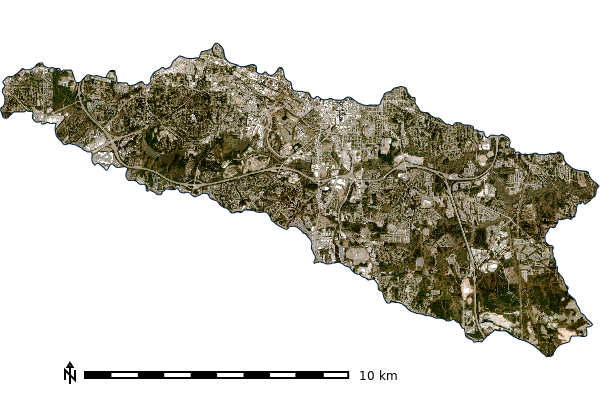

In [4]:
gs.run_command("g.region", raster="ps_before_3m_comp", res=3, flags="p")
gs.run_command("r.mask",vector="walnut_creek",overwrite=True)
before_30m_map = gj.GrassRenderer(filename="output/before_30m.png")
before_30m_map.d_erase()
before_30m_map.d_rast(map="ps_before_3m_comp")
before_30m_map.d_vect(map="walnut_creek", fill_color="none")
before_30m_map.d_barscale(at=(10,10,10,10), units="kilometers", flags="n")
before_30m_map.show()

### After Image

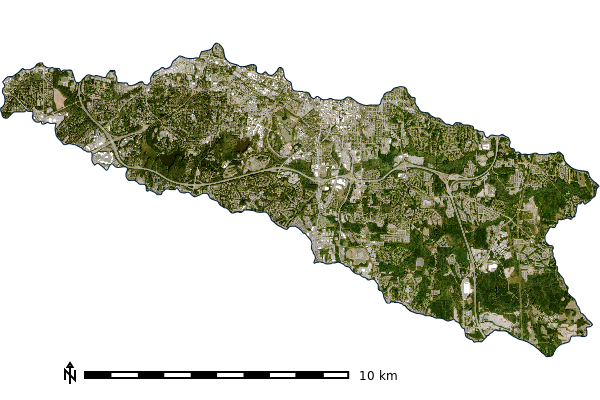

In [5]:
gs.run_command("g.region", raster="ps_before_3m_comp", res=3, flags="p")
gs.run_command("r.mask",vector="walnut_creek",overwrite=True)
after_30m_map = gj.GrassRenderer(filename="output/after_30m.png")
after_30m_map.d_erase()
after_30m_map.d_rast(map="ps_after_3m_comp")
after_30m_map.d_vect(map="walnut_creek", fill_color="none")
after_30m_map.d_barscale(at=(10,10,10,10), units="kilometers", flags="n")
after_30m_map.show()

## Land Cover

In [ ]:
gs.run_command("g.region", raster="walnut_creek", res=30, flags="p")

gs.run_command("r.import",
               input="data/classified_before_30m.tif", 
               memory=3000,
               output="classified_before_30m",
               overwrite=True
              )

gs.run_command("r.import",
               input="data/classified_after_30m.tif", 
               memory=3000,
               output="classified_after_30m",
               overwrite=True
              )

!r.reclass input=classified_before_30m output=classified_before_30m_recl rules="grass_config/classified_reclass.txt" title="Land Cover (Before)"
!r.reclass input=classified_after_30m output=classified_after_30m_recl rules="grass_config/classified_reclass.txt" title="Land Cover (After)"
!r.colors map="classified_before_30m_recl,classified_after_30m_recl" rules="grass_config/classified_colors.txt"

### Before

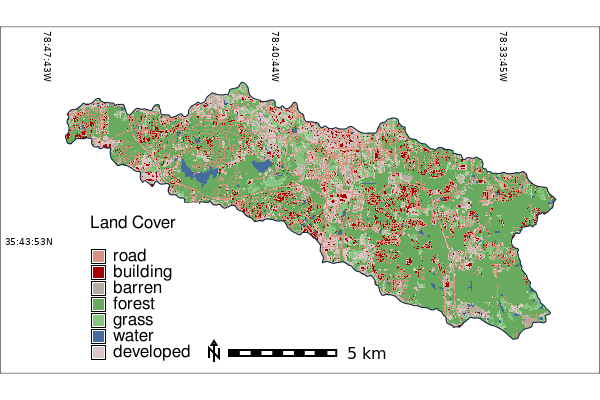

In [6]:
gs.run_command("r.mask",vector="walnut_creek",overwrite=True)
view_reg = gs.region("walnut_creek")
view_reg_n = view_reg['n'] + 2500
view_reg_w = view_reg['w'] - 3000
view_reg_e = view_reg['e'] + 2000
view_reg_s = view_reg['s'] - 1500

gs.run_command("g.region",
               raster="walnut_creek",
               n=view_reg_n,
               w=view_reg_w,
               e=view_reg_e,
               s=view_reg_s,
               res=3, flags="pa")

classified_before_30m_map = gj.GrassRenderer(filename="output/classified_before_30m.png")
classified_before_30m_map.d_erase()
classified_before_30m_map.d_rast(map="classified_before_30m_recl")
classified_before_30m_map.d_vect(map="walnut_creek", fill_color="none")
classified_before_30m_map.d_legend(raster="classified_before_30m_recl", at=(7,40,15,20),title="Land Cover",title_fontsize=12,
                                fontsize=12, 
                                font="FreeSans", 
                                border_color="none",
                                bgcolor="white", 
                                flags="ncb")

classified_before_30m_map.d_barscale(at=(34,15.5), units="kilometers", flags="n", fontsize="16", length=5)
classified_before_30m_map.d_grid(size="00:06:59", flags="dw", width=1, color="black",text_color="black")
classified_before_30m_map.show()

### After

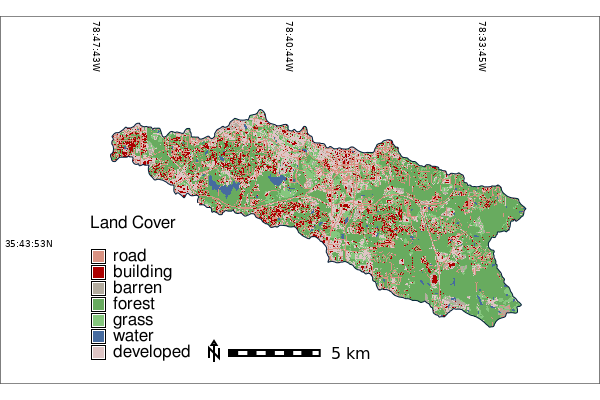

In [7]:
gs.run_command("r.mask",vector="walnut_creek",overwrite=True)
view_reg = gs.region("walnut_creek")
view_reg_n = view_reg['n'] + 2500
view_reg_w = view_reg['w'] - 3000
view_reg_e = view_reg['e'] + 2000
view_reg_s = view_reg['s'] - 1500

gs.run_command("g.region",
               raster="walnut_creek",
               n=view_reg_n,
               w=view_reg_w,
               e=view_reg_e,
               s=view_reg_s,
               # region="nw_one_third",
               res=3, flags="pa")

classified_before_30m_map = gj.GrassRenderer(filename="output/classified_after_30m.png")
classified_before_30m_map.d_erase()
classified_before_30m_map.d_rast(map="classified_after_30m_recl")
classified_before_30m_map.d_vect(map="walnut_creek", fill_color="none")
classified_before_30m_map.d_legend(raster="classified_after_30m_recl", at=(7,40,15,20),title="Land Cover",title_fontsize=12,
                                fontsize=12, 
                                font="FreeSans", 
                                border_color="none",
                                bgcolor="white", 
                                flags="ncb")

classified_before_30m_map.d_barscale(at=(34,15.5), units="kilometers", flags="n", fontsize="16", length=5)
classified_before_30m_map.d_grid(size="00:06:59", flags="dw", width=1, color="black",text_color="black")
classified_before_30m_map.show()

### Figure: Land Cover

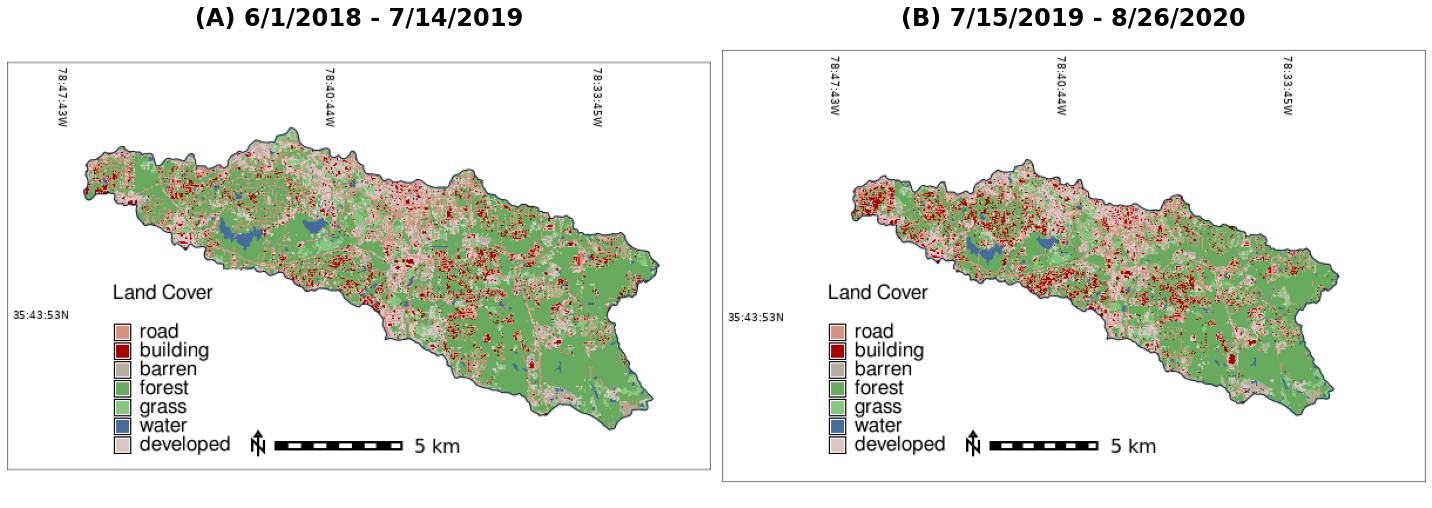

In [8]:
from PIL import Image

fig = plt.figure(figsize=(20, 18))

grs = fig.add_gridspec(1, 2)
ax1 = fig.add_subplot(grs[0, 0])
ax1.axis('off')
fig.subplots_adjust(hspace=0, wspace=0.5)

img1 = Image.open("output/classified_before_30m.png")
imgplot = plt.imshow(img1)
ax1.set_title('(A) 6/1/2018 - 7/14/2019',{"fontsize":24, "fontweight":"bold"})


ax2 = fig.add_subplot(grs[0, 1])
ax2.axis('off')
fig.subplots_adjust(hspace=0, wspace=0.5)

img1 = Image.open("output/classified_after_30m.png")
imgplot = plt.imshow(img1)
ax2.set_title('(B) 7/15/2019 - 8/26/2020',{"fontsize":24, "fontweight":"bold"})

plt.tight_layout()
plt.savefig("output/before_after_classified_fig.png",bbox_inches='tight', dpi=300)

#### Compare Land Cover

In [9]:
gs.run_command("g.region", raster="classified_before_30m_recl", res=30, flags="p")

before_class_stats = gs.parse_command("r.stats", input="classified_before_30m_recl", flags="acpln")
after_class_stats = gs.parse_command("r.stats", input="classified_after_30m_recl", flags="acpln")

landcover_dict = {"class":[] , "land cover":[], "m2":[], "cells":[], "percent":[], "Time Period":[] }
print(before_class_stats)
for k in before_class_stats.keys():
    row = k.split(" ") 
    row.append("6/1/2018 - 7/14/2019")
    for i, col in enumerate(landcover_dict.keys()):
        landcover_dict[col].append(row[i])

for k in after_class_stats.keys():
    row = k.split(" ")
    row.append("7/15/2019 - 8/26/2020")
    for i, col in enumerate(landcover_dict.keys()):
        landcover_dict[col].append(row[i])  

df_landcover = pd.DataFrame(landcover_dict)
df_landcover.head(10)


{'0 road 18899733.050479 20987 15.88%': None, '1 building 7214264.138151 8011 6.06%': None, '2 barren 3572461.095500 3967 3.00%': None, '3 forest 58426444.016938 64879 49.08%': None, '4 grass 9959124.591663 11059 8.37%': None, '5 water 2231549.935631 2478 1.87%': None, '6 developed 18750242.618956 20821 15.75%': None}


,class,land cover,m2,cells,percent,Time Period
0,0,road,18899733.050479,20987,15.88%,6/1/2018 - 7/14/2019
1,1,building,7214264.138151,8011,6.06%,6/1/2018 - 7/14/2019
2,2,barren,3572461.095500,3967,3.00%,6/1/2018 - 7/14/2019
3,3,forest,58426444.016938,64879,49.08%,6/1/2018 - 7/14/2019
4,4,grass,9959124.591663,11059,8.37%,6/1/2018 - 7/14/2019
5,5,water,2231549.935631,2478,1.87%,6/1/2018 - 7/14/2019
6,6,developed,18750242.618956,20821,15.75%,6/1/2018 - 7/14/2019
7,0,road,18899733.050479,20987,15.88%,7/15/2019 - 8/26/2020
8,1,building,9723181.862391,10797,8.17%,7/15/2019 - 8/26/2020
9,2,barren,2998814.078149,3330,2.52%,7/15/2019 - 8/26/2020


<Figure size 1440x720 with 0 Axes>

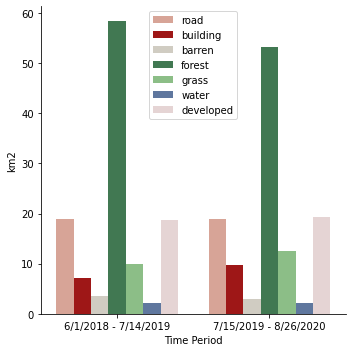

In [13]:
df_landcover['km2'] = df_landcover['m2'].apply(pd.to_numeric) / 1e6
landcover_color_palette = [
    'E29E8C', # Class 0 - road/highways         NLCD class color 22
    'B50000', # Class 1 - Building dark red     NLCD class color 24
    'D2CDC0', # Class 2 - barren                NLCD class color 31
    '38814E', # Class 3 - Forest                NLCD class color 42
    '85C77E', # Class 4 - Grass                 NLCD class color 41
    '5475A8', # Class 5 -  water                 NLCD class color 11
    'E8D1D1' # Class 5 -  developed             NLCD class color 21
]

fig = plt.figure(figsize=(20, 10))
sns.catplot(x="Time Period", 
            y="km2", 
            hue="land cover", 
            # orient="h",
            data=df_landcover,
            kind="bar", 
            legend_out=True,
            legend=False,
            palette=sns.color_palette([ "#%s" % c for c in landcover_color_palette]))
# sns.FacetGrid(df_landcover, col="time", hue="land cover", palette="tab20c")
# min_val = float(univar["min"])
plt.legend(loc='upper center')
plt.tight_layout()
plt.savefig("output/land_cover_change_chart.png",bbox_inches='tight', dpi=300)

In [16]:
!r.coin first=classified_before_30m_recl second=classified_after_30m_recl units=k
!r.stats -a -c -p -l -n input=classified_before_30m_recl,classified_after_30m_recl

Tabulating Coincidence between 'classified_before_30m_recl' and
'classified_after_30m_recl'
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100

+------------------------------------------------------------------------------+
|                        COINCIDENCE TABULATION REPORT                         |
|------------------------------------------------------------------------------|
| Location: nc_spm_08_gras  Mapset: rapid-dsm        Date: Wed Feb 23 23:42:19 |
|                                                                              |
| Layer 1: classified_befo-- Land Cover (Before)                               |
| Layer 2: classified_afte-- Land Cover (After)                                |
| Mask:    <MASK> in mapset <rapid-dsm>                                        |
|                                                                              |
| Units:   square kilometers         

# Priority Queue

## Binary Change

Mean: 38.4974641875785
Std: 194.156128751552
Change Threshold: -446.89285769130146


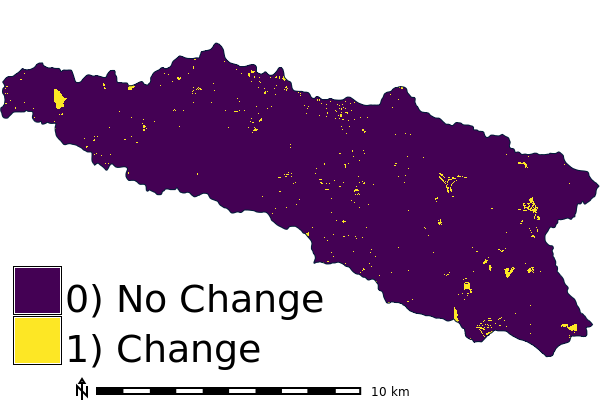

In [50]:
gs.run_command("g.region", raster="ps_before_3m_comp", res=3, flags="p")
gs.run_command("r.mask",vector="walnut_creek",overwrite=True)

rd.binary_change("ps_before_3m.3", "ps_after_3m.3")

gs.run_command("r.reclass", input="binary_change_mask", output="binary_change_mask_reclass", rules="grass_config/binary_change_reclass.txt", title="Binary Change")
gs.run_command("r.clump",input="binary_change_mask", output="binary_change_objects", minsize=10, flags="d")
binary_change_map = gj.GrassRenderer(filename="output/binary_change_mask.png")
binary_change_map.d_erase()
binary_change_map.d_rast(map="binary_change_mask")
binary_change_map.d_vect(map="walnut_creek", fill_color="none")
binary_change_map.d_legend(raster="binary_change_mask_reclass", at=(2,40,2,6))
binary_change_map.d_barscale(at=(12,6,12,10), units="kilometers", flags="n")
binary_change_map.show()

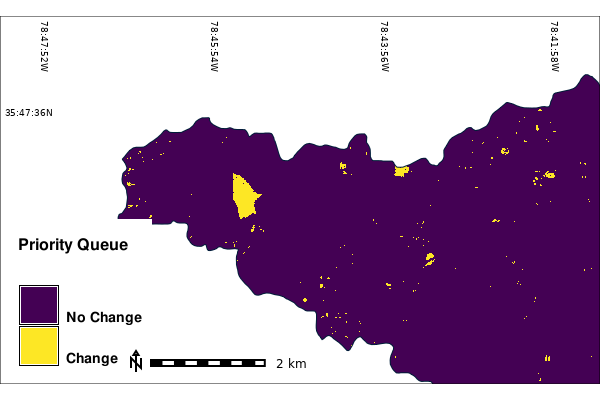

In [20]:
gs.run_command("g.region", region="nw_one_third", res=3, flags="pa")
view_reg = gs.region("nw_one_third")
view_reg_n = view_reg['n'] + 1500
view_reg_w = view_reg['w'] - 2000
view_reg_e = view_reg['e'] + 1000
view_reg_s = view_reg['s'] - 500

gs.run_command("g.region",
               region="nw_one_third",
               n=view_reg_n,
               w=view_reg_w,
               e=view_reg_e,
               s=view_reg_s,
               # region="nw_one_third",
               res=3, flags="pa")



binary_change_map = gj.GrassRenderer(filename="output/binary_change_mask_nw.png")
binary_change_map.d_erase()
binary_change_map.d_rast(map="binary_change_mask_reclass")
binary_change_map.d_vect(map="walnut_creek", fill_color="none")
binary_change_map.d_grid(size="00:01:58", flags="dw", width=1, color="black",text_color="black")
binary_change_map.d_legend(raster="binary_change_mask_reclass", at=(3,34,3,6),title="Priority Queue",title_fontsize=16,
                                fontsize=14, 
                                font="FreeSans:Bold", 
                                border_color="none",
                                bgcolor="white",flags="cb" )
binary_change_map.d_barscale(at=(21,13), units="kilometers", length=2, flags="n")

binary_change_map.show()

## Priority Change (PC)

In [35]:
help(rd.priority_change_calc)

Help on function priority_change_calc in module rapid_dem:

priority_change_calc(output)
    Maps Thematic Land Cover Maps into the priority change map.



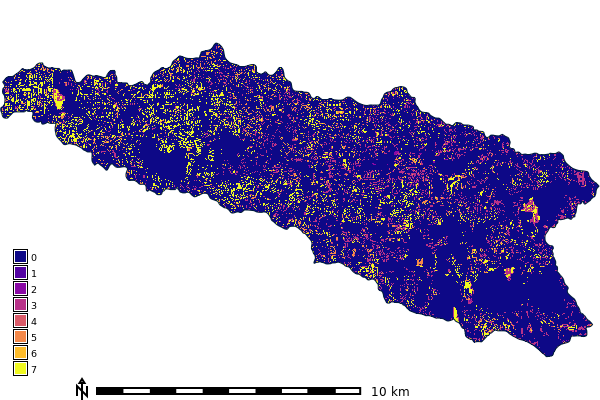

In [37]:
gs.run_command("g.region", raster="classified_before_30m", res=3, flags="pa")
gs.run_command("r.mask",vector="walnut_creek",overwrite=True)
rd.priority_change_calc(
    # before_landcover="classified_before_30m_recl", 
    # after_landcover="classified_after_30m_recl", 
    output="priority_change_30m")
priority_change_30m_map = gj.GrassRenderer(filename="output/priority_change.png")
priority_change_30m_map.d_erase()
priority_change_30m_map.d_rast(map="ps_before_3m_comp")
priority_change_30m_map.d_rast(map="priority_change_30m")
priority_change_30m_map.d_vect(map="walnut_creek", fill_color="none")
priority_change_30m_map.d_legend(raster="priority_change_30m", at=(2,40,2,6))
priority_change_30m_map.d_barscale(at=(12,6,12,10), units="kilometers", flags="n")
priority_change_30m_map.show()

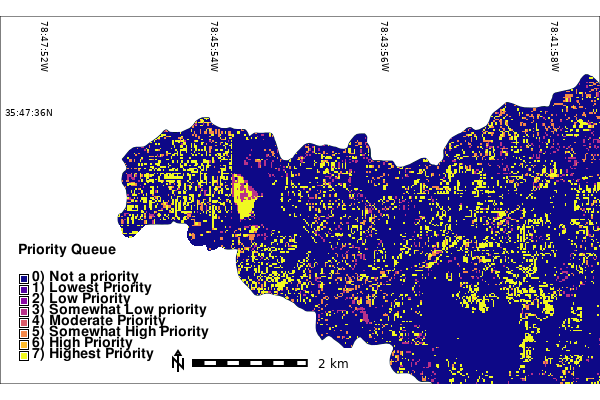

In [38]:
gs.run_command("g.region", region="nw_one_third", res=3, flags="pa")
view_reg = gs.region("nw_one_third")
view_reg_n = view_reg['n'] + 1500
view_reg_w = view_reg['w'] - 2000
view_reg_e = view_reg['e'] + 1000
view_reg_s = view_reg['s'] - 500

gs.run_command("g.region",
               region="nw_one_third",
               n=view_reg_n,
               w=view_reg_w,
               e=view_reg_e,
               s=view_reg_s,
               res=3, flags="pa")

!r.reclass input=priority_change_30m output=priority_change_30m_reclass rules="grass_config/priority_reclass.txt" title="Priority Change"
gs.run_command("r.colors", map="priority_change_30m_reclass", color="plasma")



priority_change_30m_map = gj.GrassRenderer(filename="output/priority_change_nw.png")
priority_change_30m_map.d_erase()
priority_change_30m_map.d_rast(map="ps_before_3m_comp")
priority_change_30m_map.d_vect(map="walnut_creek", fill_color="none")
priority_change_30m_map.d_grid(size="00:01:58", flags="dw", width=1, color="black",text_color="black")
priority_change_30m_map.d_legend(raster="priority_change_30m_reclass", at=(7,33,3,6),title="Priority Queue",title_fontsize=14,
                                fontsize=14, 
                                font="FreeSans:Bold", 
                                border_color="none",
                                bgcolor="white",flags="b" )
priority_change_30m_map.d_rast(map="priority_change_30m")

priority_change_30m_map.d_barscale(at=(28,13), units="kilometers", length=2, flags="n")

priority_change_30m_map.show()

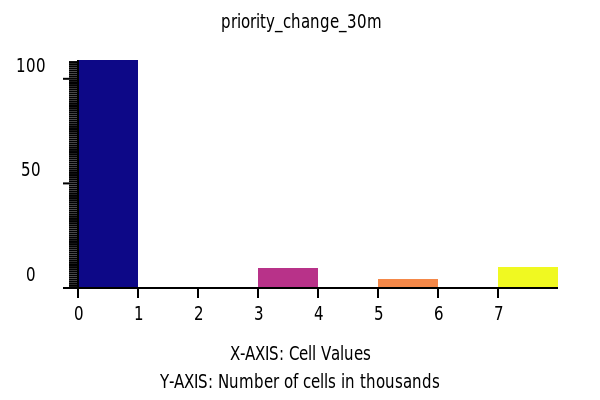

In [39]:
gs.run_command("g.region", raster="classified_before_30m", res=30, flags="pa")
priority_change_30m_hist = gj.GrassRenderer()
priority_change_30m_hist.d_histogram(map="priority_change_30m")
priority_change_30m_hist.show()

## Mean Object Priority Change (MOPC)

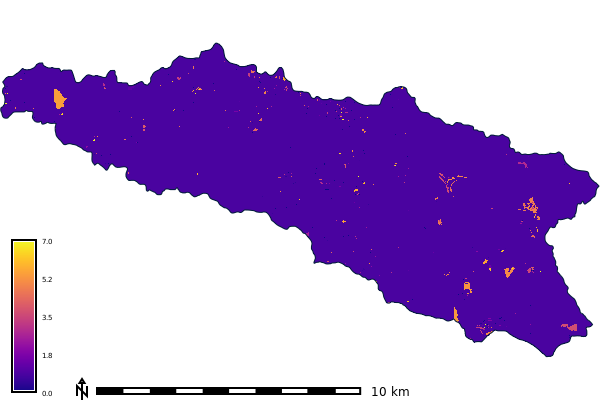

In [43]:
gs.run_command("g.region", raster="classified_before_30m", res=3, flags="pa")
gs.run_command("r.mask",raster="binary_change_objects",overwrite=True)

gs.run_command("r.stats.zonal", base="binary_change_objects", cover="priority_change_30m", method="average", output="mopc", overwrite=True)
priority_change_30m_map = gj.GrassRenderer(filename="output/mopc.png")
priority_change_30m_map.d_erase()
priority_change_30m_map.d_rast(map="ps_before_3m_comp")
priority_change_30m_map.d_rast(map="mopc")
priority_change_30m_map.d_vect(map="walnut_creek", fill_color="none")
priority_change_30m_map.d_legend(raster="mopc", at=(2,40,2,6))
priority_change_30m_map.d_barscale(at=(12,6,12,10), units="kilometers", flags="n")
priority_change_30m_map.show()

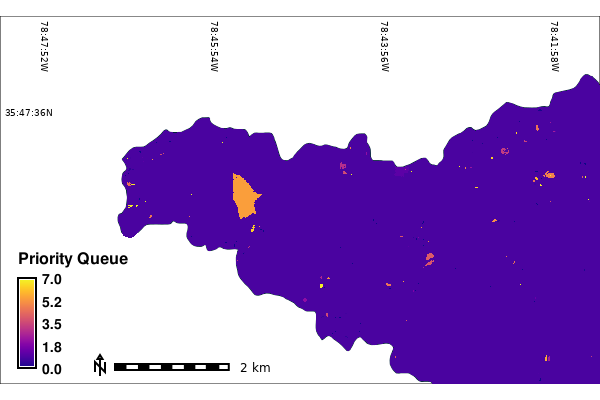

In [46]:
gs.run_command("g.region", region="nw_one_third", res=3, flags="pa")
view_reg = gs.region("nw_one_third")
view_reg_n = view_reg['n'] + 1500
view_reg_w = view_reg['w'] - 2000
view_reg_e = view_reg['e'] + 1000
view_reg_s = view_reg['s'] - 500

gs.run_command("g.region",
               region="nw_one_third",
               n=view_reg_n,
               w=view_reg_w,
               e=view_reg_e,
               s=view_reg_s,
               # region="nw_one_third",
               res=3, flags="pa")

priority_change_30m_map = gj.GrassRenderer(filename="output/mopc_nw.png")
priority_change_30m_map.d_erase()
priority_change_30m_map.d_rast(map="ps_before_3m_comp")
priority_change_30m_map.d_rast(map="mopc")
priority_change_30m_map.d_vect(map="walnut_creek", fill_color="none")
priority_change_30m_map.d_grid(size="00:01:58", flags="dw", width=1, color="black",text_color="black")
priority_change_30m_map.d_legend(raster="mopc", at=(8,30.5,3,6),title="Priority Queue",title_fontsize=16,
                                fontsize=14, 
                                font="FreeSans:Bold", 
                                border_color="none",
                                bgcolor="white",flags="b" )
priority_change_30m_map.d_rast(map="mopc")

priority_change_30m_map.d_barscale(at=(15,12), units="kilometers", length=2, flags="n")
priority_change_30m_map.show()

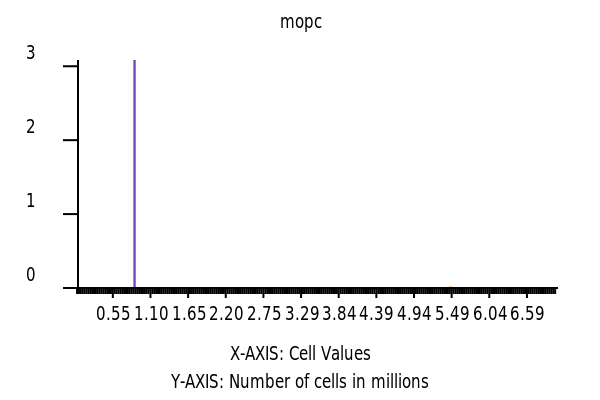

In [47]:
mopc_hist = gj.GrassRenderer()
mopc_hist.d_histogram(map="mopc")
mopc_hist.show()

## Change Object Area (COA)

### Object Size (OS)

First pass
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Writing output map
   0   3   6   9  12  15  18  21  24  27  30  33  36  39  42  45  48  51  54  57  60  63  66  69  72  75  78  81  84  87  90  93  96  99 100
Color table for raster map <object_size> set to 'gyr'


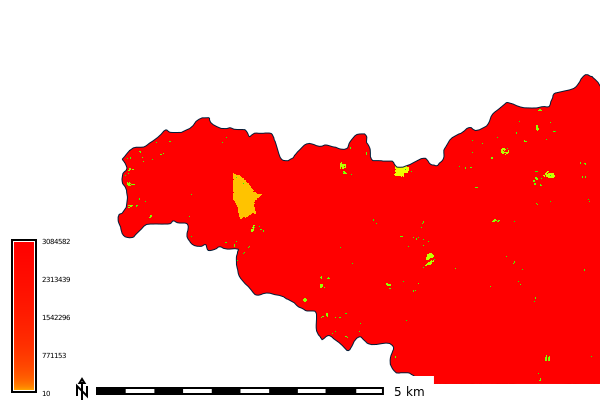

In [48]:
!r.stats.zonal base=binary_change_objects cover=binary_change_mask method=count output=object_size --overwrite
!r.colors object_size color=gyr -g
priority_change_30m_map = gj.GrassRenderer(filename="output/object_size.png")
priority_change_30m_map.d_erase()
priority_change_30m_map.d_rast(map="ps_before_3m_comp")
priority_change_30m_map.d_rast(map="object_size")
priority_change_30m_map.d_vect(map="walnut_creek", fill_color="none")
priority_change_30m_map.d_legend(raster="object_size", at=(2,40,2,6))
priority_change_30m_map.d_barscale(at=(12,6,12,10), units="kilometers", flags="n")
priority_change_30m_map.show()

### Object Area (OA)

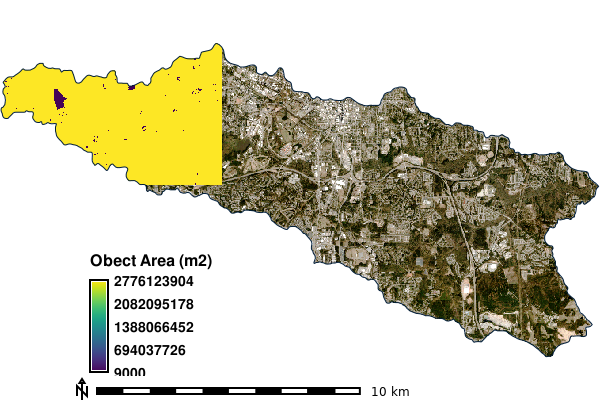

In [49]:
gs.run_command("g.region", raster="classified_before_30m", res=30, flags="pa")

gs.mapcalc(f"object_pixel_area = object_size * 900") # 30m x 30m = 900m2 (OPA)
priority_change_30m_map = gj.GrassRenderer(filename="output/object_pixel_area.png")
priority_change_30m_map.d_erase()
priority_change_30m_map.d_rast(map="ps_before_3m_comp")
priority_change_30m_map.d_rast(map="object_pixel_area")
priority_change_30m_map.d_vect(map="walnut_creek", fill_color="none")
priority_change_30m_map.d_legend(raster="object_pixel_area", at=(7,30,15,18),title="Obect Area (m2)",title_fontsize=16,
                                fontsize=14, 
                                font="FreeSans:Bold", 
                                border_color="none",
                                bgcolor="white" )
priority_change_30m_map.d_barscale(at=(12,6,12,10), units="kilometers", flags="n")
priority_change_30m_map.show()

## Priority Change (PQ)

In [1]:
gs.run_command("g.region", raster="classified_before_30m", res=30, flags="p")
gs.mapcalc(f"priority_queue = float(mopc) * float(object_pixel_area)")
univar = gs.parse_command("r.univar", map="priority_queue", flags="ge")
min_val = float(univar["min"])
print(min_val)
max_val = float(univar["max"])
print(max_val)
gs.run_command("r.mapcalc", 
               expression=f"priority_queue_norm = ((priority_queue - {min_val}) / ({max_val} - {min_val}))",
               overwrite=True)
!r.reclass input=priority_queue_norm output=priority_queue_norm_recl rules="grass_config/priority_reclass.txt" title="Priority Queue"
!r.colors map="priority_queue_norm_recl" rules="grass_config/priority_colors.txt"
priority_change_30m_map = gj.GrassRenderer(filename="output/priority_queue_norm.png")
priority_change_30m_map.d_erase()
priority_change_30m_map.d_rast(map="ps_before_3m_comp")
priority_change_30m_map.d_rast(map="priority_queue_norm")
priority_change_30m_map.d_vect(map="walnut_creek", fill_color="none")
priority_change_30m_map.d_legend(raster="priority_queue_norm", at=(2,40,2,6))
priority_change_30m_map.d_barscale(at=(12,6,12,10), units="kilometers", flags="n")
priority_change_30m_map.show()

NameError: name 'gs' is not defined

In [ ]:
gs.run_command("g.region", region="nw_one_third", res=3, flags="pa")
view_reg = gs.region("nw_one_third")
view_reg_n = view_reg['n'] + 1500
view_reg_w = view_reg['w'] - 2000
view_reg_e = view_reg['e'] + 1000
view_reg_s = view_reg['s'] - 500

gs.run_command("g.region",
               region="nw_one_third",
               n=view_reg_n,
               w=view_reg_w,
               e=view_reg_e,
               s=view_reg_s,
               # region="nw_one_third",
               res=3, flags="pa")

priority_change_30m_map = gj.GrassRenderer(filename="output/priority_queue_norm_nw.png")
priority_change_30m_map.d_erase()
priority_change_30m_map.d_rast(map="ps_after_3m_comp")
priority_change_30m_map.d_rast(map="priority_queue_norm")
priority_change_30m_map.d_vect(map="walnut_creek", fill_color="none")
priority_change_30m_map.d_grid(size="00:01:58", flags="dw", width=1, color="black",text_color="black")
priority_change_30m_map.d_legend(raster="priority_queue_norm", at=(8,30,3,6),title="Priority Queue",title_fontsize=16,
                                fontsize=14, 
                                font="FreeSans:Bold", 
                                border_color="none",
                                bgcolor="white",flags="b" )
priority_change_30m_map.d_barscale(at=(15,12), units="kilometers", length=2, flags="n")
priority_change_30m_map.show()

In [ ]:
gs.run_command("g.region", raster="classified_before_30m", res=30, flags="p")
priorityQueueMulti30m_hist = gj.GrassRenderer(filename="output/priority_queue_norm_hist.png")
priorityQueueMulti30m_hist.d_histogram(map="priority_queue_norm")
priorityQueueMulti30m_hist.show()

## Priority Queue Vector (PQV)

In [ ]:
# !r.fill.stats input=priority_queue_norm output=priority_queue_norm_filled uncertainty=uncertainty distance=4 mode=mode power=2.0 cells=5
# !r.to.vect input=priority_queue_norm_filled output=priority_queue_norm type=area -vs # Do not overwrite this file it has the validation data
# # Add and area field
# !v.db.addcolumn map=priority_queue_norm columns="area double precision"
# !v.to.db map=priority_queue_norm option=area columns=area
# !v.colors map=priority_queue_norm use=attr column=value color=plasma

In [ ]:
priority_change_30m_map = gj.GrassRenderer(filename="output/priority_queue_norm_vect.png")
priority_change_30m_map.d_erase()
priority_change_30m_map.d_rast(map="ps_after_3m_comp")
priority_change_30m_map.d_vect(map="priority_queue_norm", fill_color="none")
priority_change_30m_map.d_vect(map="walnut_creek", fill_color="none")
priority_change_30m_map.d_legend(raster="priority_queue_norm", at=(2,40,2,6), title="Priority (High 1 - Low 1)", title_fontsize=10)

priority_change_30m_map.d_barscale(at=(12,6,12,10), units="kilometers", flags="n")
priority_change_30m_map.show()

In [ ]:
gs.run_command("g.region", region="nw_one_third", res=3, flags="pa")
view_reg = gs.region("nw_one_third")
view_reg_n = view_reg['n'] + 1500
view_reg_w = view_reg['w'] - 2000
view_reg_e = view_reg['e'] + 1000
view_reg_s = view_reg['s'] - 500

gs.run_command("g.region",
               region="nw_one_third",
               n=view_reg_n,
               w=view_reg_w,
               e=view_reg_e,
               s=view_reg_s,
               # region="nw_one_third",
               res=3, flags="pa")

priority_change_30m_map = gj.GrassRenderer(filename="output/priority_queue_norm_nw.png")
priority_change_30m_map.d_erase()
priority_change_30m_map.d_rast(map="ps_after_3m_comp")
priority_change_30m_map.d_rast(map="priority_queue_norm")
priority_change_30m_map.d_vect(map="walnut_creek", fill_color="none")
priority_change_30m_map.d_legend(raster="priority_queue_norm", at=(7,30,15,18),title="Priority Queue",title_fontsize=12,
                                fontsize=10, 
                                font="FreeSans:Bold", 
                                border_color="none",
                                bgcolor="white" )
priority_change_30m_map.d_barscale(at=(25,12), units="kilometers", length=2, flags="n")
priority_change_30m_map.d_grid(size="00:01:58", flags="dw", width=1, color="black",text_color="black")
# priority_change_30m_map.show()




priority_change_30m_map = gj.GrassRenderer(filename="output/priority_queue_norm_vect_nw.png")
priority_change_30m_map.d_erase()
priority_change_30m_map.d_rast(map="ps_after_3m_comp")
priority_change_30m_map.d_vect(map="priority_queue_norm", fill_color="none", width=3)
priority_change_30m_map.d_vect(map="priority_queue_clean_med",
                               fill_color="none", color="black",
                               attribute_column="rank", 
                               where="rank <= 100",
                               label_color="white", xref="center", yref="center",
                               label_size=21, font="FreeSans:Bold")
priority_change_30m_map.d_vect(map="walnut_creek", fill_color="none")
# priority_change_30m_map.d_legend(raster="priority_queue_norm", at=(2,40,2,6), title="Priority (High 1 - Low 1)", title_fontsize=10)
priority_change_30m_map.d_barscale(at=(15,12), units="kilometers", length=2, flags="n")
priority_change_30m_map.d_grid(size="00:01:58", flags="dw", width=4, color="black",text_color="black")
priority_change_30m_map.show()

# Figure: Priority Queue Methods

In [ ]:
# binary_change_mask_nw
# priority_change_nw
# mopc_nw
# object_pixel_area_nw
# priority_queue_norm_nw
# priority_queue_norm_vect_nw
from PIL import Image

fig = plt.figure(figsize=(20, 18))

# ax = fig.add_subplot(2, 1, 1)
# fig.subplots_adjust(hspace=0, wspace=0.1)

grs = fig.add_gridspec(3, 2)
ax1 = fig.add_subplot(grs[0, 0])
ax1.axis('off')
fig.subplots_adjust(hspace=0, wspace=0.5)

img1 = Image.open("output/binary_change_mask_nw.png")
imgplot = plt.imshow(img1)
ax1.set_title('(A) Binary Change Mask',{"fontsize":24, "fontweight":"bold"})


ax2 = fig.add_subplot(grs[0,1])
ax2.axis('off')
fig.subplots_adjust(hspace=0, wspace=0.5)

img2 = Image.open("output/priority_change_nw.png")
imgplot = plt.imshow(img2)
ax2.set_title('(B) Priority Change',{"fontsize":24, "fontweight":"bold"})

ax3 = fig.add_subplot(grs[1,0])
ax3.axis('off')
fig.subplots_adjust(hspace=5, wspace=5)

img3 = Image.open("output/mopc_nw.png")
imgplot = plt.imshow(img3)
ax3.set_title('(C) Mean Object Priority Change',{"fontsize":24, "fontweight":"bold"})

# spans two rows:
ax4 = fig.add_subplot(grs[1, 1])
ax4.axis('off')
fig.subplots_adjust(hspace=0, wspace=0.5)
img4 = Image.open("output/object_pixel_area_nw.png")
imgplot = plt.imshow(img4)
ax4.set_title('(D) Change Object Area',{"fontsize":24, "fontweight":"bold"})

ax5 = fig.add_subplot(grs[2, 0])
ax5.axis('off')
fig.subplots_adjust(hspace=0, wspace=0.5)
img5 = Image.open("output/priority_queue_norm_nw.png")
imgplot = plt.imshow(img5)
ax5.set_title('(E) Priority Queue',{"fontsize":24, "fontweight":"bold"})

ax6 = fig.add_subplot(grs[2, 1])
ax6.axis('off')
fig.subplots_adjust(hspace=0, wspace=0.5)
img6 = Image.open("output/priority_queue_norm_vect_nw.png")
imgplot = plt.imshow(img6)
ax6.set_title('(F) Priority Queue Vector',{"fontsize":24, "fontweight":"bold"})

plt.tight_layout()
plt.savefig("output/priority_queue_alg_figure1.png",bbox_inches='tight', dpi=300)

# Priority Context Map

In [ ]:
gs.run_command("g.region", raster="classified_before_30m", res=3, flags="pa")
gs.run_command("r.mask",vector="walnut_creek",overwrite=True)
rd.land_change_action("land_change_action_30m")

gs.run_command("g.region", region="nw_one_third", res=3, flags="pa")

priority_change_30m_map = gj.GrassRenderer(filename="output/land_change_action_30m.png")
priority_change_30m_map.d_erase()
priority_change_30m_map.d_rast(map="ps_after_3m_comp")
priority_change_30m_map.d_rast(map="land_change_30m")
priority_change_30m_map.d_vect(map="walnut_creek", fill_color="none")
priority_change_30m_map.d_vect(map="priority_queue_clean_med", fill_color="none")

priority_change_30m_map.d_legend(raster="land_change_30m", at=(2,40,2,6), flags="ncd")
priority_change_30m_map.d_barscale(at=(12,6,12,10), units="kilometers", flags="n")
priority_change_30m_map.show()

In [ ]:
gs.run_command("g.region", raster="ps_after_3m_comp", res=3, flags="pa")
!v.to.rast input=priority_queue_norm output=priority_queue_int_mask use=cat memory=3000
# v.to.rast input=priority_queue_clean_med@rapid-dsm output=priority_queue_clean_med use=cat memory=3000
# gs.run_command("r.mask",vector="priority_queue_norm",overwrite=True)
!v.to.rast input=priority_queue_clean_med output=priority_queue_clean_med use=cat memory=3000 --overwrite
# gs.run_command("r.mask",raster="priority_queue_clean_med",overwrite=True)
gs.run_command("r.neighbors",input="land_change_basic_actions_30m",
               method="mode,diversity,count",
               size=15,
               selection="priority_queue_norm",
               output="priority_queue_context_mode,priority_queue_context_diversity,priority_queue_context_count", overwrite=True)
gs.run_command("r.reclass", input="priority_queue_context_mode", rules="grass_config/land_change_zonal_action_reclass.txt", title="Land Change Actions",output="priority_queue_context_mode_reclass")

gs.run_command("r.mode",
               base="priority_queue_clean_med",
               # base="priority_queue_int_mask",
               cover="priority_queue_context_mode",
               output="priority_queue_context_zonal", overwrite=True)
gs.run_command("r.reclass", input="priority_queue_context_zonal", rules="grass_config/land_change_zonal_action_reclass.txt", title="Land Change Actions",output="priority_queue_context")
# gs.run_command("r.colors", map="priority_queue_context", raster="land_change_basic_actions_30m")


In [ ]:
!v.to.rast input=priority_queue_clean_med output=priority_queue_clean_med use=cat memory=3000 label_column=value --overwrite
gs.run_command("g.region", raster="ps_after_3m_comp", res=3, flags="pa")

priority_change_context = gs.parse_command("r.stats", 
                                           input="priority_queue_clean_med,priority_queue_context",#,priority_queue_context_mode_reclass", 
                                           flags="acpln", separator="|")
landcover_change_dict = {
    # "east":[],"north":[],
    "ObjectId":[], "Priority Value":[],"Action Class":[],"Action":[],
    # "Mode Action Class":[],"Mode Action":[],
    "m2":[], "cells":[], "percent":[] }
for k in priority_change_context.keys():
    row = k.split("|") 
    # print(row)
    for i, col in enumerate(landcover_change_dict.keys()):
        landcover_change_dict[col].append(row[i])

# landcover_change_dict["Priority Value"] = [round(float(value.split("-")[1]),3) for value in landcover_change_dict["Priority Value"]]
df_landcover_change = pd.DataFrame(landcover_change_dict)

df_landcover_change['km2'] = df_landcover_change['m2'].apply(pd.to_numeric) / 1e6
df_landcover_change['rank'] = df_landcover_change['Priority Value'].rank(ascending=False, method="dense")

df_landcover_change = df_landcover_change.sort_values(by="Priority Value",ascending=False)
df_landcover_change.head(10)

In [ ]:
# gs.run_command("v.db.addcolumn", map="priority_queue_clean_med", columns="rank double precision")
for index, row in df_landcover_change.iterrows():
    # print(row["ObjectId"], row["rank"])
    query = f'cat = {row["ObjectId"]}'
    # print(query)
    # I'm sure there is a better way to do this but this will work for now
    gs.run_command("v.db.update", map="priority_queue_clean_med", column="rank", qcol=row["rank"], where=query)

In [ ]:
df_landcover_change.groupby(by=["Action"]).describe()

In [ ]:
sns.scatterplot(x="rank", y="km2", hue="Action", data=df_landcover_change) #, palette=sns.color_palette([ "#%s" % c for c in landcover_color_palette]))

# Figure: Priority Context

In [ ]:
gs.run_command("r.mask",vector="walnut_creek",overwrite=True)
gs.run_command("g.region",
               raster="walnut_creek",
               # region="nw_one_third",
               res=3, flags="pa")

view_reg = gs.region("walnut_creek")
view_reg_n = view_reg['n'] + 1500
view_reg_w = view_reg['w'] - 1500
gs.run_command("g.region",
               raster="walnut_creek",
               n=view_reg_n,
               w=view_reg_w,
               # region="nw_one_third",
               res=3, flags="pa")
priority_change_30m_map = gj.GrassRenderer(height=900, width=1400,filename="output/land_change_basic_actions_30m.png")
priority_change_30m_map.d_erase()

priority_change_30m_map.d_rast(map="ps_after_3m_comp")
priority_change_30m_map.d_rast(map="priority_queue_context")
priority_change_30m_map.d_vect(map="walnut_creek", fill_color="none")
priority_change_30m_map.d_vect(map="priority_queue_clean_med",
                               fill_color="none", color="black",
                               attribute_column="rank", 
                               where="rank <= 10",
                               label_color="white", xref="center", yref="center",
                               label_size=20, font="FreeSans:Bold")
# priority_change_30m_map.d_vect_thematic(map="priority_queue_clean_med", column="rank", algorithm="equ", nclasses=5, colors="254:240:217,253:204:138,252:141:89,227:74:51,179:0:0", fill_color="none",legend_title="Priority Queue")

priority_change_30m_map.d_legend(raster="priority_queue_context", at=(10,30,9,50),title="Priority Context",title_fontsize=20, use=[2,3,7,8],
                                fontsize=16, 
                                font="FreeSans:Bold", 
                                border_color="none",
                                bgcolor="white", 
                                flags="ncb")
priority_change_30m_map.d_barscale(at=(26,13.5), units="kilometers", flags="n", fontsize="16")
# priority_change_30m_map.d_grid(size="00:00:50", flags="g")
priority_change_30m_map.d_grid(size="00:03:58", flags="dw", width=1, color="black",text_color="black")

priority_change_30m_map.show()

# Figure: Site 1 Before and After

## Site 1 - Before

In [ ]:
gs.run_command("g.region",raster="ned_19sec_site_priority_1", res=3, flags="pa")
view_reg = gs.region("ned_19sec_site_priority_1")
view_reg_w = view_reg['w'] + 100
view_reg_n = view_reg['n'] - 300
gs.run_command("g.region",raster="ned_19sec_site_priority_1", res=3, flags="pa", w=view_reg_w, n=view_reg_n)
ps_before_3m_cary_map = gj.GrassRenderer(filename="output/ps_before_3m_fenton_map.png")
ps_before_3m_cary_map.d_erase()
ps_before_3m_cary_map.d_rast(map="ps_before_3m_comp")
ps_before_3m_cary_map.d_vect(map="fenton_pq_boundary", fill_color="none", color="yellow", width="2",legend_label="Top Priority")
ps_before_3m_cary_map.d_legend_vect(at=(60,10,2,6),font="FreeSans", flags="b")
ps_before_3m_cary_map.d_barscale(at=(15,9,2,2), units="meters",font="FreeSans")
ps_before_3m_cary_map.d_grid(size="00:00:59", flags="dw", width=4, color="black",text_color="white",fontsize=14)

ps_before_3m_cary_map.show()

## Site 1 - After

In [ ]:
gs.run_command("g.region",raster="ned_19sec_site_priority_1", res=3, flags="pa")
view_reg = gs.region("ned_19sec_site_priority_1")
view_reg_w = view_reg['w'] + 100
view_reg_n = view_reg['n'] - 300
gs.run_command("g.region",raster="ned_19sec_site_priority_1", res=3, flags="pa", w=view_reg_w, n=view_reg_n)

# gs.run_command("r.mask", flags="r")
priority_queue_3m_cary_map = gj.GrassRenderer(filename="output/priority_queue_3m_fenton_map.png")
priority_queue_3m_cary_map.d_erase()
priority_queue_3m_cary_map.d_rast(map="ps_after_3m_comp")
# priority_queue_3m_cary_map.d_rast(map="priorityQueueMulti30m_norm")
priority_queue_3m_cary_map.d_vect(map="fenton_pq_boundary", fill_color="none", color="yellow", width="2",legend_label="Top Priority")
priority_queue_3m_cary_map.d_legend_vect(at=(60,10,2,6),font="FreeSans", flags="b")

# priority_queue_3m_cary_map.d_legend(raster="priorityQueueMulti30m_norm", title="Priority", title_fontsize=10, at=(12,60,2,5))
priority_queue_3m_cary_map.d_barscale(at=(15,9,2,2), units="meters", font="FreeSans")
priority_queue_3m_cary_map.d_grid(size="00:00:59", flags="dw", width=4, color="black",text_color="white",fontsize=14)
priority_queue_3m_cary_map.show()

In [ ]:
from PIL import Image

fig = plt.figure(figsize=(20, 18))

ax = fig.add_subplot(1, 2, 1)
fig.subplots_adjust(hspace=0, wspace=0.1)
ax.set_axis_off()
img_ortho = Image.open("output/ps_before_3m_fenton_map.png")
imgplot = plt.imshow(img_ortho)
ax.set_title('(A) 6/1/2018 - 7/14/2019',{"fontsize":24, "fontweight":"bold"})

ax = fig.add_subplot(1, 2, 2)
ax.set_axis_off()

img2 = Image.open("output/priority_queue_3m_fenton_map.png")
imgplot = plt.imshow(img2)
# imgplot.set_clim(0.0, 0.7)
ax.set_title('(B) 7/15/2019 - 8/26/2020',{"fontsize":24, "fontweight":"bold"})

plt.tight_layout()
plt.savefig("output/priority_queue_3m_fenton_figure.png",bbox_inches='tight')

# Validation

In [ ]:
import pandas as pd
import sqlite3
 
# Read in the attribute table
sqlpath = gs.read_command("db.databases", driver="sqlite").replace('\n', '')
con = sqlite3.connect(sqlpath)
sqlstat="SELECT * FROM priority_queue_norm"
df = pd.read_sql_query(sqlstat, con)
con.close()

In [ ]:
df[(df.value == 0) & (df.noise == 0)].describe()

In [ ]:
print(df_priority["area"].mean())
print(df_priority["km2"].mean())
print(df_priority["value"].mean())

In [ ]:
!v.extract --overwrite input=priority_queue_norm@rapid-dsm where="area > 58921.10091743119 AND value > 0.049559220183486234" output=priority_queue_clean
!v.colors map=priority_queue_clean@rapid-dsm use=attr column=value color=plasma

In [ ]:
df_priority_clean_med = df_priority[(df_priority["km2"] > df_priority["km2"].median()) & (df_priority["value"] > df_priority["value"].median())]
df_priority_clean_med.groupby("noise").describe()

In [ ]:
# Calculate confidence
n_size = []
n_correct = []
n_error = []
n_perc_error = []
nf_size = []
nf_correct = []
nf_error = []
nf_perc_error = []
nf_perc_loss_e = []
nf_perc_loss_c = []
area_thres = []
value_thres = []
df_conf_envelope = pd.DataFrame({})
for n in range(500):
    samp = df_priority.sample(frac=0.8, replace=False, random_state=n)
    samp_area_median = samp.km2.median()
    samp_value_median = samp.value.median()
    n_total = samp.count().value
    n_size.append(n_total)
    correct_total = samp[samp.noise == 0].count().value
    n_correct.append(correct_total)
    error_total = samp[samp.noise == 1].count().value
    n_error.append(error_total)
    error_rate = (error_total / (n_total)) * 100.0
    n_perc_error.append(error_rate)
    area_thres.append(samp_area_median)
    value_thres.append(samp_value_median)
    samp_filtered = samp[(samp["km2"] > samp_area_median) & (samp["value"] > samp_value_median)]
    n_filtered = samp_filtered.count().value
    nf_size.append(n_filtered)
    nf_error_count = samp_filtered[samp_filtered.noise == 1].count().value
    nf_error.append(nf_error_count)
    nf_correct_count = samp_filtered[samp_filtered.noise == 0].count().value
    nf_correct.append(nf_correct_count)
    nf_error_rate = (nf_error_count / (n_filtered)) * 100.0
    nf_perc_error.append(nf_error_rate)
    nf_loss_e = ((error_total - nf_error_count) / error_total)*100
    nf_perc_loss_e.append(nf_loss_e)
    nf_loss_c = ((correct_total - nf_correct_count) / correct_total)* 100
    nf_perc_loss_c.append(nf_loss_c)

    
df_conf_envelope = pd.DataFrame({
    "n_size": n_size,
    "n_correct":n_correct,
    "n_error":n_error,
    "n_perc_error": n_perc_error,
    "nf_size": nf_size,
    "nf_correct": nf_correct,
    "nf_error": nf_error,
    "nf_perc_error":nf_perc_error,
    "nf_perc_loss_e": nf_perc_loss_e,
    "nf_perc_loss_c": nf_perc_loss_c,
    "area_thres": area_thres,
    "value_thres": value_thres
})

df_conf_envelope.head()

In [ ]:
fig = plt.figure(figsize=(9, 7))
df_priority['Legend'] = df_priority.noise.map({0:"Valid", 1: "Error"})
ax = sns.scatterplot(data=df_priority, x="km2", y="value", hue="Legend")
ax.set_title('Priority Queue Error',{"fontsize":24, "fontweight":"bold"})
ax.set_xlabel('km2', fontsize=16)
ax.set_ylabel('Priority Value', fontsize=16)
plt.axvline(df_priority["km2"].median(), color='black', ls="--")
plt.axvline(df_conf_envelope["area_thres"].max(), color='grey', ls=":") #max
plt.axvline(df_conf_envelope["area_thres"].min(), color='grey', ls=":") #min
plt.axhline(df_priority["value"].median(), color='black', ls="--")
plt.axhline(df_conf_envelope["value_thres"].max(), color='grey', ls=":") #max
plt.axhline(df_conf_envelope["value_thres"].min(), color='grey', ls=":") #min
# handles, labels = ax.get_legend_handles_labels()
# print(handles, labels)
ax.legend(loc='upper left')
# plt.legend(handles=[plt],labels=['Median', 'Envelope'])

plt.tight_layout()
plt.savefig("output/priority_queue_error.png",bbox_inches='tight')